# **Deepika kumari**
 Task 1
Prediction using Supervised ML
In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
@The Sparks Foundation


In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
# Sklearn package's randomized data splitting function
from sklearn.model_selection import train_test_split 


In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
cData = pd.read_csv(url)
print("Data imported successfully")
cData.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
cData.shape

(25, 2)

In [4]:
cData.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
cData.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
cData.median()

Hours      4.8
Scores    47.0
dtype: float64

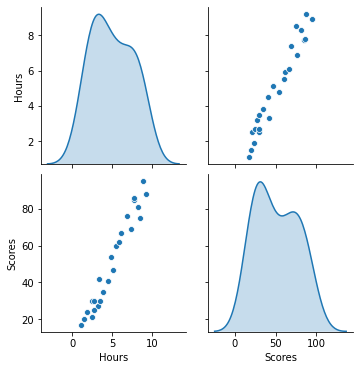

In [7]:
cData_attr = cData.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   # to plot density curve instead of histogram on the diag

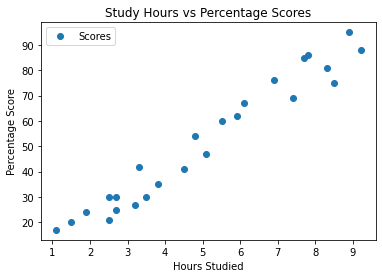

In [8]:
# Plotting the distribution of scores
cData.plot(x='Hours', y='Scores', style='o')  
plt.title('Study Hours vs Percentage Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Here we see that there is a positive linear relation between the number of hours studied and percentage of score. 

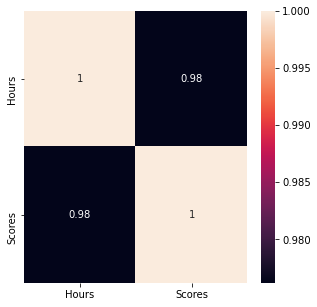

In [9]:
#correlation plot
plt.figure(figsize=(5,5))
correlation_matrix = cData.corr()
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

# Data Prepocessing

In [10]:
X = cData.iloc[:, :-1].values  
y = cData.iloc[:, 1].values  

In [11]:
##Spliting this data into training and test sets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Creating a model

In [12]:
from sklearn.linear_model import LinearRegression
#initiating linear regression model
model=LinearRegression()
#fitting the data to to model
model.fit(X_train,y_train)
print("Model is trained")

Model is trained


In [13]:
#Model is predicting against the test data
pred_y=model.predict(X_test)
pred_y

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# **Comparing the Predicted Values and Actual Values**

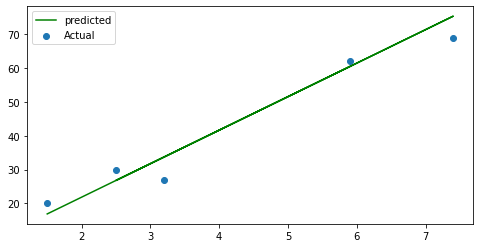

In [14]:
#graphical representation of predicted and actual value
plt.figure(figsize=(8,4))
plt.plot(X_test,pred_y,label="predicted",color="Green")
plt.scatter(X_test,y_test,label="Actual")
plt.legend()
plt.show()

In [15]:
#Tabular representation of predicted and actual values
pd.DataFrame({"Actual Value":y_test,"Predicted Value":pred_y})

,Actual Value,Predicted Value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [17]:
#input requires 2D array
hours=[[9.25]]
#Center is use to make it look in the center
print("PREDICTION FROM THE MODEL".center(60))
#model to predict the value and print it 
print(f"If student studies for {hours[0][0]} then they are expcted to score {model.predict(hours)[0] :.3f} % ")
#Note the predicted value may differ based on which data (random state of traintestsplit) is used to train the model
#Change the random state and predict the same value

                 PREDICTION FROM THE MODEL                  
If student studies for 9.25 then they are expcted to score 93.692 % 


# **Evaluating the model**

In [18]:
#some matrix to check how our model is performed
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("Mean Absolute Error ",mean_absolute_error(y_test,pred_y))
#the value will be high cause it punishes the model to for smaller difference also
print("Mean Squared Error ",mean_squared_error(y_test,pred_y))

Mean Absolute Error  4.183859899002975
Mean Squared Error  21.5987693072174
